## Radius of condensates

In [1]:
import os
import glob
from tkinter import filedialog as fd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Directory containing the CSV files
directory_path = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\no_drug\Analysed Data\2x\ilastik_output_radius_calculation"

# Find all CSV files in the directory
file_paths = glob.glob(os.path.join(directory_path, "*.csv"))

if not file_paths:
    print("No CSV files found in the directory. Exiting.")
    exit()

In [3]:
# Aggregate data from all found files
all_data = []

for file_path in file_paths:
    data = pd.read_csv(file_path)
    all_data.append(data["R_nm"])

# Combine all the data into a single Series
combined_data = pd.Series(pd.concat(all_data).values)

In [4]:
mean_radius = combined_data.mean()
print(f"Mean radius: {mean_radius:.2f} nm")

Mean radius: 257.75 nm


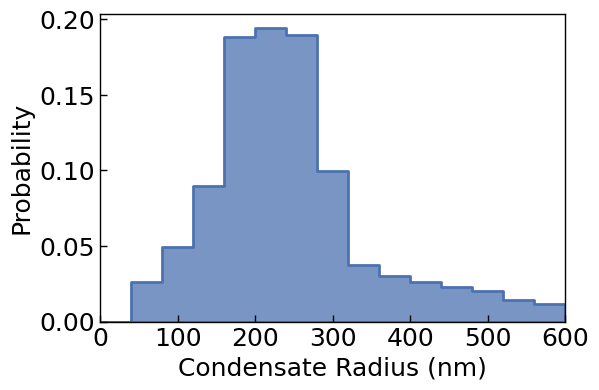

In [5]:
# Create the plot
plt.figure(figsize=(6, 4))

ax = sns.histplot(
    data=combined_data,
    bins=15,
    binrange=(0, 600),
    stat="probability",
    common_norm=False,
    # binrange=(0, 500),  # Adjust range as needed
    lw=2,
    element="step",
    legend=False,
    color="#4C72B0"
)

# plt.axvline(250, ls="--", c="gray", lw=2)
# plt.text(
#     275,
#     0.078,
#     r"N$_{condensates}$=" + f"{len(combined_data):,}",
#     fontdict={"fontsize": 16},
# )

plt.xlim(0, 600)  # Adjust as needed
plt.ylim(0, None)
plt.xlabel(r"Condensate Radius (nm)", fontsize=18)
plt.ylabel("Probability", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=18)
plt.savefig("condensate_radius_histogram.png", format="png", bbox_inches="tight", dpi=600)
plt.show()

## Radius distribution - Noco vs + Noco, 30 mins

In [5]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True, style="white")

In [6]:
directory_condition1 = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\no_drug\Analysed Data\2x\ilastik_output_radius_calculation"
directory_condition2 = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\Nocodazole\20uM\Analysed Data\30min\ilastik_output_radius_calculation"


In [7]:
csv_files_1 = glob.glob(os.path.join(directory_condition1, "*.csv"))
csv_files_2 = glob.glob(os.path.join(directory_condition2, "*.csv"))

In [8]:
def load_and_label_files(file_paths, label):
    combined_df_list = []
    for file in file_paths:
        df = pd.read_csv(file)
        df['Condition'] = label
        df['title'] = os.path.basename(file)
        combined_df_list.append(df)
    combined_df = pd.concat(combined_df_list, ignore_index=True)
    return combined_df


In [9]:
df_condition1 = load_and_label_files(csv_files_1, '- Noco')
df_condition2 = load_and_label_files(csv_files_2, '+ Noco, 30 mins')

In [10]:
df_combined = pd.concat([df_condition1, df_condition2], ignore_index=True)

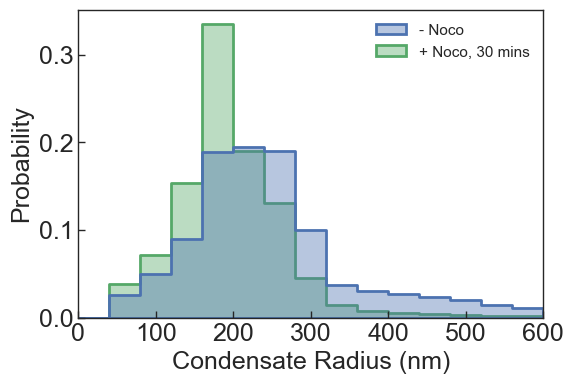

In [11]:
plt.figure(figsize=(6, 4))

ax = sns.histplot(
    data=df_combined,
    x="R_nm",
    hue="Condition",
    bins=15,
    binrange=(0, 600),
    stat="probability",
    common_norm=False,
    lw=2,
    element="step",
    fill=True,
    alpha=0.4,
    palette={"- Noco": "#4C72B0", "+ Noco, 30 mins": "#55A868"},
    hue_order=["- Noco", "+ Noco, 30 mins"]
)

plt.xlim(0, 600)  # Adjust as needed
plt.ylim(0, None)
plt.xlabel(r"Condensate Radius (nm)", fontsize=18)
plt.ylabel("Probability", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=18)

legend = ax.get_legend()
legend.set_title(None)
legend_frame = legend.get_frame()
legend_frame.set_visible(False)

# Modify legend order
# handles = ax.legend_.legendHandles[::-1]
# ax.legend(handles, ['- Noco', '+ Noco, 30 mins'])

# Removing the long decimal in the legend labels
# for text in ax.legend().get_texts():
#     text.set_text(text.get_text().split('=')[0].strip())

plt.savefig("condensate_radius_histogram_comparison.png", format="png", bbox_inches="tight", dpi=600)
plt.show()

## Radius distribution - Noco vs + Noco, 30 mins

In [12]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True, style="white")

In [13]:
directory_condition1 = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\no_drug\Analysed Data\2x\ilastik_output_radius_calculation"
directory_condition2 = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\LatrunculinA\5uM\2x\Analysed Data\30min\ilastik_output_radius_calculation"


In [14]:
csv_files_1 = glob.glob(os.path.join(directory_condition1, "*.csv"))
csv_files_2 = glob.glob(os.path.join(directory_condition2, "*.csv"))

In [15]:
def load_and_label_files(file_paths, label):
    combined_df_list = []
    for file in file_paths:
        df = pd.read_csv(file)
        df['Condition'] = label
        df['title'] = os.path.basename(file)
        combined_df_list.append(df)
    combined_df = pd.concat(combined_df_list, ignore_index=True)
    return combined_df


In [16]:
df_condition1 = load_and_label_files(csv_files_1, '- LatA')
df_condition2 = load_and_label_files(csv_files_2, '+ LatA, 30 mins')

In [17]:
df_combined = pd.concat([df_condition1, df_condition2], ignore_index=True)

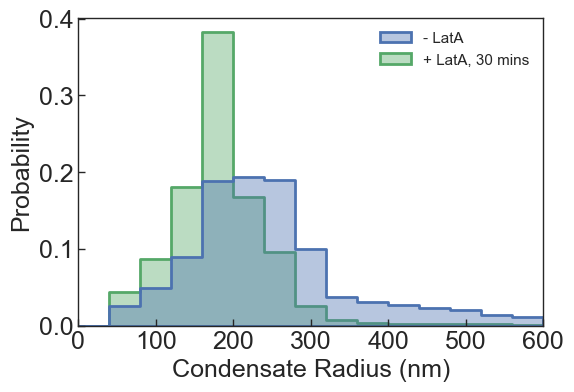

In [18]:
plt.figure(figsize=(6, 4))

ax = sns.histplot(
    data=df_combined,
    x="R_nm",
    hue="Condition",
    bins=15,
    binrange=(0, 600),
    stat="probability",
    common_norm=False,
    lw=2,
    element="step",
    fill=True,
    alpha=0.4,
    palette={"- LatA": "#4C72B0", "+ LatA, 30 mins": "#55A868"},
    hue_order=["- LatA", "+ LatA, 30 mins"]
)

plt.xlim(0, 600)  # Adjust as needed
plt.ylim(0, None)
plt.xlabel(r"Condensate Radius (nm)", fontsize=18)
plt.ylabel("Probability", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=18)

legend = ax.get_legend()
legend.set_title(None)
legend_frame = legend.get_frame()
legend_frame.set_visible(False)

# Modify legend order
# handles = ax.legend_.legendHandles[::-1]
# ax.legend(handles, ['- Noco', '+ Noco, 30 mins'])

# Removing the long decimal in the legend labels
# for text in ax.legend().get_texts():
#     text.set_text(text.get_text().split('=')[0].strip())

plt.savefig("condensate_radius_histogram_comparison_LatA.png", format="png", bbox_inches="tight", dpi=600)
plt.show()

## Radius distribution HOPS vs PB, 30 mins

In [1]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True, style="white")

In [2]:
directory_condition1 = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\no_drug\Analysed Data\2x\ilastik_output_radius_calculation"
directory_condition2 = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\no_drug\Analysed Data\1x\bandpass filtered"


In [3]:
csv_files_1 = glob.glob(os.path.join(directory_condition1, "*.csv"))
csv_files_2 = glob.glob(os.path.join(directory_condition2, "*.csv"))

In [4]:
def load_and_label_files(file_paths, label):
    combined_df_list = []
    for file in file_paths:
        df = pd.read_csv(file)
        df['Condition'] = label
        df['title'] = os.path.basename(file)
        combined_df_list.append(df)
    combined_df = pd.concat(combined_df_list, ignore_index=True)
    return combined_df


In [5]:
df_condition1 = load_and_label_files(csv_files_1, 'HOPS')
df_condition2 = load_and_label_files(csv_files_2, 'PB')

In [6]:
df_combined = pd.concat([df_condition1, df_condition2], ignore_index=True)

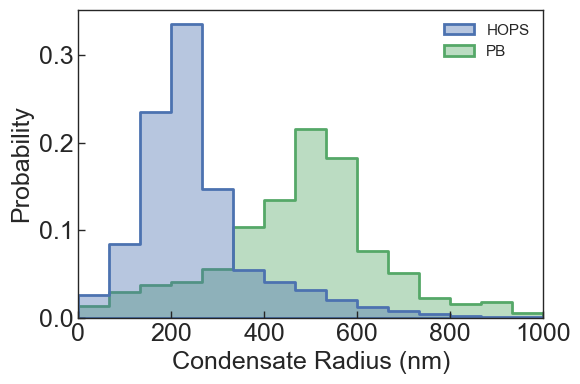

In [8]:
plt.figure(figsize=(6, 4))

ax = sns.histplot(
    data=df_combined,
    x="R_nm",
    hue="Condition",
    bins=15,
    binrange=(0, 1000),
    stat="probability",
    common_norm=False,
    lw=2,
    element="step",
    fill=True,
    alpha=0.4,
    palette={"HOPS": "#4C72B0", "PB": "#55A868"},
    hue_order=["HOPS", "PB"]
)

plt.xlim(0, 1000)  # Adjust as needed
plt.ylim(0, None)
plt.xlabel(r"Condensate Radius (nm)", fontsize=18)
plt.ylabel("Probability", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=18)

legend = ax.get_legend()
legend.set_title(None)
legend_frame = legend.get_frame()
legend_frame.set_visible(False)

# Modify legend order
# handles = ax.legend_.legendHandles[::-1]
# ax.legend(handles, ['- Noco', '+ Noco, 30 mins'])

# Removing the long decimal in the legend labels
# for text in ax.legend().get_texts():
#     text.set_text(text.get_text().split('=')[0].strip())

plt.savefig("condensate_radius_histogram_comparison_LatA.png", format="png", bbox_inches="tight", dpi=600)
plt.show()